# Sorting n * log(n) algorithms

## Importing libraries and classes

In [2]:
import matplotlib.pyplot as plt
import random
import time
from itertools import chain

## Algorithms

**Quick sort**

In [3]:
def quicksort(vec):
    less = []
    eq = []
    greater = []
    
    if len(vec) > 1:
        pvt = vec[0]
        for i in vec:
            if i < pvt:
                less.append(i)
            elif i == pvt:
                eq.append(i)
            else:
                greater.append(i)
        
        return quicksort(less) + eq + quicksort(greater)
    
    else:
        return vec

**Merge sort**

In [4]:
def mergesort(vec):
    if len(vec) > 1:
        m = len(vec)//2 # integer only
        left = vec[:m]
        right = vec[m:]
        
        mergesort(left)
        mergesort(right)
        
        i = x = y = 0
        
        while i < len(left) and x < len(right):
            if left[i] < right[x]:
                vec[y] = left[i]
                i += 1
                
            else:
                vec[y] = right[x]
                x += 1
            y += 1
            
        while i < len(left): 
            vec[y] = left[i] 
            i += 1
            y += 1
          
        while x < len(right): 
            vec[y] = right[x] 
            x += 1
            y += 1
        return vec
    else:
        return vec


**Bucket**

In [80]:
def bucket_sort(vec):

    buckets = [[] for _ in range(1001)]
    for i in range(len(vec)):
        bucket = vec[i]
        if bucket >= 0 and bucket < 1001:
            buckets[bucket].append(vec[i])
#     print(buckets)
    return buckets
# v = [1,1,1,1,1,1,1,2,2,2,2,2,100]
# bucket_sort(v)

**Bucket quick**

In [81]:
def bucket_quick(vec):
    buckets = bucket_sort(vec)
    
    for i in range(len(buckets)):
        quicksort(buckets[i])

    return list(chain(*buckets))

**Bucket merge**

In [82]:
def bucket_merge(vec):
    buckets = bucket_sort(vec)
    
    for i in range(len(buckets)):
        mergesort(buckets[i])
        
    return list(chain(*buckets))

## Creating vector to sort

In [83]:
l = []
lim = 1001
for i in range(lim):
    l.append(random.randint(0, lim))

## Iterating, creating time lists and plotting time graphs

In [107]:
q = []
m = []
bq = []
bm = []
k = w = j = l
iter = int(input())

for i in range(iter):
    start = time.time()
    quicksort(l)
    end = time.time()
    time_quick = end - start
    q.append(time_quick)
    
    random.shuffle(l)

    start2 = time.time()
    mergesort(k)
    end2 = time.time()
    time_merge = end2 - start2
    m.append(time_merge)
    
    random.shuffle(k)
    
    start3 = time.time()
    bucket_quick(w)
    end3 = time.time()
    time_bucket_quick = end3 - start3
    bq.append(time_bucket_quick)
        
    random.shuffle(w)
    
    start4 = time.time()
    bucket_merge(j)
    end4 = time.time()
    time_bucket_merge = end4 - start4
    bm.append(time_bucket_merge)
            
    random.shuffle(j)

1000


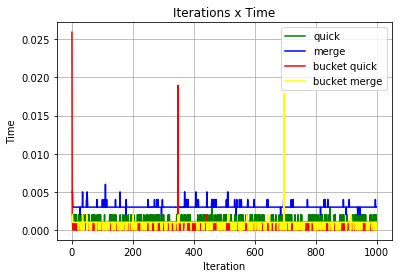

In [108]:
plt.title("Iterations x Time")
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.plot(q,  color='green', label='quick')
plt.plot(m,  color='blue', label='merge')
plt.plot(bq,  color='red', label='bucket quick')
plt.plot(bm,  color='yellow', label='bucket merge')
plt.legend()
plt.grid(True)
plt.show()

## Calculating mean of each time list and plotting mean graph

In [109]:
def mean(l: list):
    return sum(l) / len(l)

In [113]:
means= []
q_mean = mean(q)
m_mean = mean(m)
bq_mean = mean(bq)
bm_mean = mean(bm)
print("Quicksort mean = {}\nMergesort mean = {}\nBucket quick mean = {}\nBucket merge mean = {}\n"
      .format(q_mean, m_mean, bq_mean, bm_mean))
means = [q_mean, m_mean, bq_mean, bm_mean]

Quicksort mean = 0.0011928613185882568
Mergesort mean = 0.003048693418502808
Bucket quick mean = 0.0006753301620483398
Bucket merge mean = 0.0008655776977539063



In [111]:
def plot(means):
    plt.title("Algorithm x Time mean")
    plt.xlabel('Algorithm')
    plt.ylabel('Time mean')
    x = range(4)
    colors=["red", "green", "blue", "purple"]
    plt.bar(x, means, color = colors)
    plt.xticks(x, ('Quicksort', 'Mergesort', 'Bucket quick', 'Bucket merge'))
    plt.grid(linewidth=.1)
    plt.show()

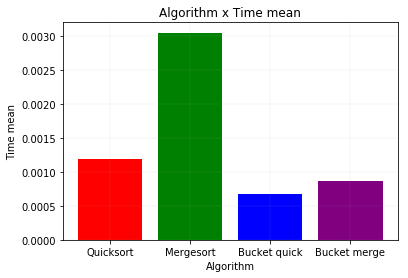

In [112]:
plot(means)